Statistics 21: Python and Other Technologies for Data Science - Final Project

Rik Mukherjee, Kevin Ngo, Bofei He, Wenhan Lu, Ray Min

Importing libraries

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import datetime
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

In [ ]:
#import data
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

<ipython-input-2-cab7ef6e8721>:2: DtypeWarning: Columns (4,31,33,76,94,96,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')


In [ ]:
na_counts = df.isna().sum()
columns_with_na = na_counts[na_counts > 10000].index


In [ ]:
threshold = 10000

#Dro the columns with 10000 or more NA values
df = df.dropna(thresh=len(df) - threshold + 1, axis = 1)

In [ ]:
df.isna().sum()

eventid          0
iyear            0
imonth           0
iday             0
approxdate    9639
              ... 
INT_LOG          1
INT_IDEO         1
INT_MISC         1
INT_ANY          1
related       9034
Length: 135, dtype: int64

Subsetting columns used

In [ ]:
df = df[['eventid', 'iyear',
 'imonth',
 'iday',
 'extended',
 'country_txt',
 'region_txt',
 'provstate',
 'city',
 'success',
 'suicide',
 'attacktype1_txt',
 'targtype1_txt',
 'target1',
 'natlty1_txt',
 'gname',
 'guncertain1',
 'individual',
 'weaptype1_txt',
 'dbsource', 'latitude', 'longitude']]

In [ ]:
df.dtypes

eventid              int64
iyear                int64
imonth               int64
iday                 int64
extended           float64
country_txt         object
region_txt          object
provstate           object
city                object
success            float64
suicide            float64
attacktype1_txt     object
targtype1_txt       object
target1             object
natlty1_txt         object
gname               object
guncertain1        float64
individual         float64
weaptype1_txt       object
dbsource            object
latitude           float64
longitude          float64
dtype: object

In [ ]:
df = df.dropna(how = 'any', axis = 0)

In [ ]:
df.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
extended           0
country_txt        0
region_txt         0
provstate          0
city               0
success            0
suicide            0
attacktype1_txt    0
targtype1_txt      0
target1            0
natlty1_txt        0
gname              0
guncertain1        0
individual         0
weaptype1_txt      0
dbsource           0
latitude           0
longitude          0
dtype: int64

In [ ]:
df.shape

(9220, 22)

Exporting csv file of cleaned data for the team to use

In [ ]:
df.to_csv('terrorist_clean.csv', index = False)

## Hypothesis 1: (Larry)

In [ ]:
#Remove regions without too much data since ML requires a lot of entries, also days listed as 0 for some reason
values = ['Australasia & Oceania', 'East Asia', 'Central Asia']
df1 = df[df.region_txt.isin(values) == False]
values2 = [0]
df1 = df1[df.iday.isin(values2) == False]

<ipython-input-12-c14c8d7bdf12>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[df.iday.isin(values2) == False]


<ipython-input-13-987d8c473b53>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['attacktype1_txt'] = label_encoder.fit_transform(X['attacktype1_txt'])
<ipython-input-13-987d8c473b53>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['targtype1_txt'] = label_encoder.fit_transform(X['targtype1_txt'])
<ipython-input-13-987d8c473b53>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

                             precision    recall  f1-score   support

Central America & Caribbean       0.80      0.71      0.75       154
             Eastern Europe       1.00      0.25      0.40         4
 Middle East & North Africa       0.69      0.59      0.63       214
              North America       0.87      0.87      0.87       310
              South America       0.73      0.68      0.70       190
                 South Asia       0.67      0.67      0.67         3
             Southeast Asia       0.82      0.50      0.62        28
         Sub-Saharan Africa       0.64      0.23      0.33        31
             Western Europe       0.83      0.91      0.87       859

                   accuracy                           0.81      1793
                  macro avg       0.78      0.60      0.65      1793
               weighted avg       0.80      0.81      0.80      1793



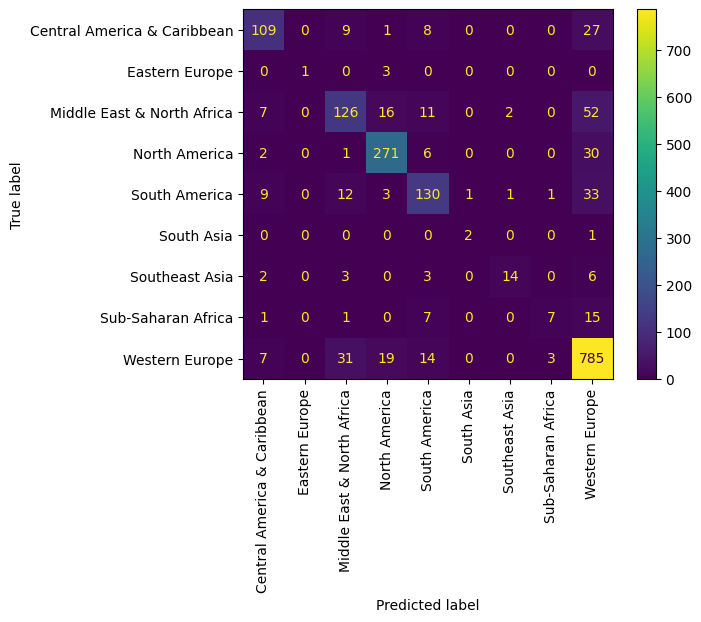

In [ ]:
X = df1[['success', 'suicide', 'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt', 'iyear', 'imonth', 'iday', 'gname']]
y = df1['region_txt']

# Encode categorical variables
label_encoder = LabelEncoder()
X['attacktype1_txt'] = label_encoder.fit_transform(X['attacktype1_txt'])
X['targtype1_txt'] = label_encoder.fit_transform(X['targtype1_txt'])
X['weaptype1_txt'] = label_encoder.fit_transform(X['weaptype1_txt'])
X['gname'] = label_encoder.fit_transform(X['gname'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Predict the regions for the test data
y_pred = classifier.predict(X_test)

# Print the classification report and confusion matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.xticks(rotation=90)
plt.show()

[0.01577217 0.         0.06154683 0.11103074 0.04810952 0.17059871
 0.12279543 0.15136081 0.31878579]


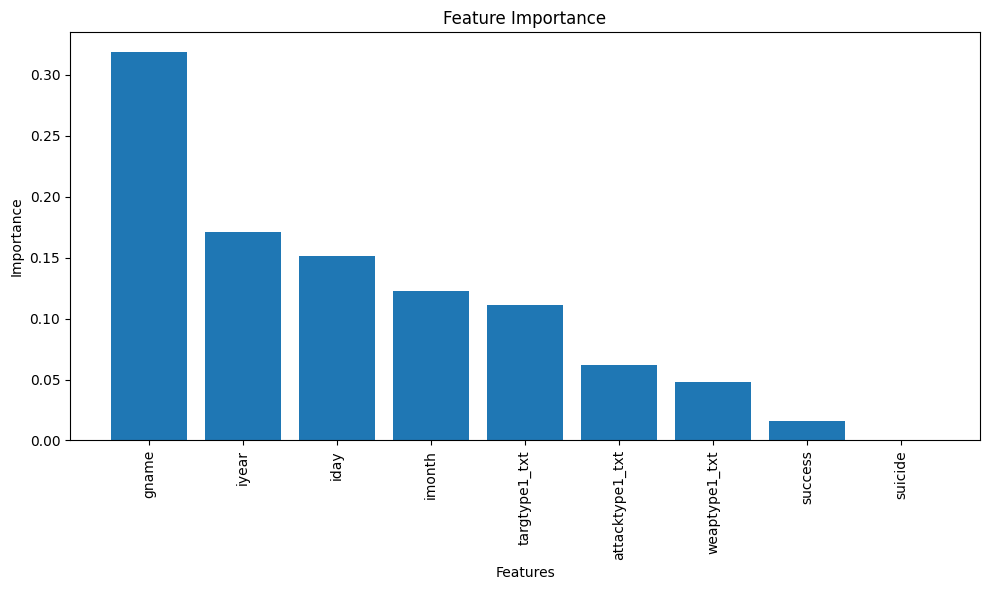

In [ ]:
importances = classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
print(importances)
# Get the feature names
feature_names = X.columns[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices])
plt.xticks(range(len(importances)), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
grouped_data = df1.groupby('region_txt')

# Calculate the median day, month, and year for each region
median_day = grouped_data['iday'].median()
median_month = grouped_data['imonth'].median()
median_year = grouped_data['iyear'].median()

# Create a new DataFrame to store the results
median_dates = pd.DataFrame({'Median Day': median_day, 'Median Month': median_month, 'Median Year': median_year})
# Print the median dates for each region
print(median_dates)

                             Median Day  Median Month  Median Year
region_txt                                                        
Central America & Caribbean        15.0           6.0       1979.0
Eastern Europe                     17.0           6.0       1971.0
Middle East & North Africa         16.0           7.0       1978.0
North America                      15.0           6.0       1973.0
South America                      15.0           7.0       1977.0
South Asia                         14.0           7.0       1979.0
Southeast Asia                     16.0           6.0       1978.0
Sub-Saharan Africa                 15.0           5.0       1979.0
Western Europe                     15.0           6.0       1977.0


In [ ]:
grouped_data = df1.groupby(['region_txt', 'targtype1_txt']).size().reset_index(name='count')

# Find the index of the maximum count for each region
max_targets_idx = grouped_data.groupby('region_txt')['count'].idxmax()

# Get the corresponding target type for each region
most_targeted_groups = grouped_data.loc[max_targets_idx, ['region_txt', 'targtype1_txt']]

# Print the most targeted group in each region
print(most_targeted_groups)

                      region_txt         targtype1_txt
1    Central America & Caribbean              Business
22                Eastern Europe                Police
28    Middle East & North Africa              Business
49                 North America              Business
69                 South America              Business
88                    South Asia  Government (General)
104               Southeast Asia              Military
112           Sub-Saharan Africa              Business
128               Western Europe              Business


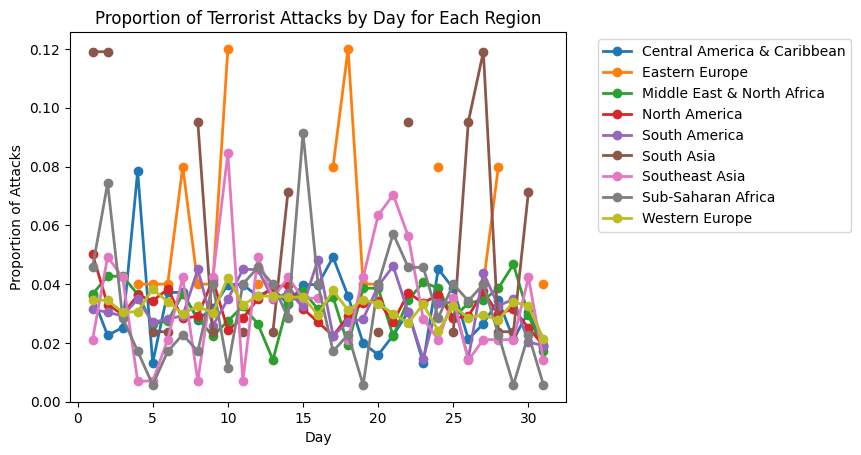

In [ ]:
# Group the data by region and day, and count the number of attacks
grouped_data = df1.groupby(['region_txt', 'iday']).size().reset_index(name='count')

# Calculate the total number of attacks for each region
total_attacks = grouped_data.groupby('region_txt')['count'].sum()

# Calculate the proportion of attacks for each day and region
grouped_data['proportion'] = grouped_data['count'] / grouped_data['region_txt'].map(total_attacks)

# Pivot the data to have regions as columns and days as rows
pivot_data = grouped_data.pivot(index='iday', columns='region_txt', values='proportion')

# Plot the proportions for each region
pivot_data.plot(kind='line', marker='o', linewidth=2)

# Set the plot title and labels
plt.title('Proportion of Terrorist Attacks by Day for Each Region')
plt.xlabel('Day')
plt.ylabel('Proportion of Attacks')

# Show the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


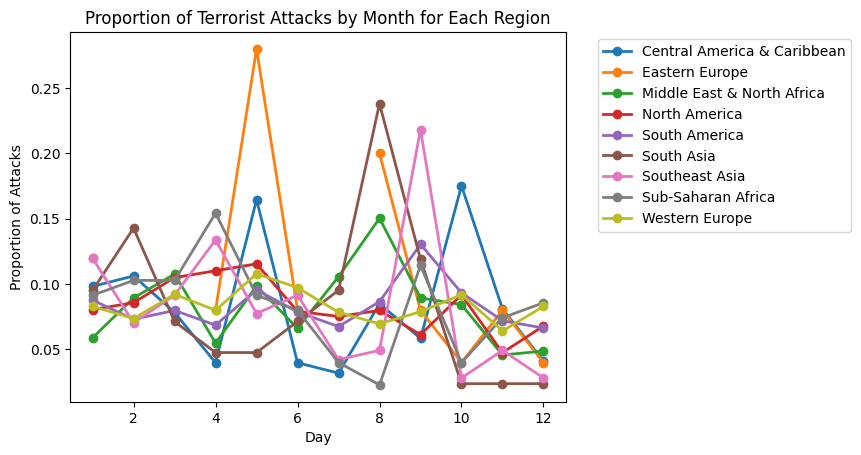

In [ ]:
# Group the data by region and month, and count the number of attacks
grouped_data = df1.groupby(['region_txt', 'imonth']).size().reset_index(name='count')

# Calculate the total number of attacks for each region
total_attacks = grouped_data.groupby('region_txt')['count'].sum()

# Calculate the proportion of attacks for each month and region
grouped_data['proportion'] = grouped_data['count'] / grouped_data['region_txt'].map(total_attacks)

# Pivot the data to have regions as columns and month as rows
pivot_data = grouped_data.pivot(index='imonth', columns='region_txt', values='proportion')

# Plot the proportions for each region
pivot_data.plot(kind='line', marker='o', linewidth=2)

# Set the plot title and labels
plt.title('Proportion of Terrorist Attacks by Month for Each Region')
plt.xlabel('Day')
plt.ylabel('Proportion of Attacks')

# Show the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


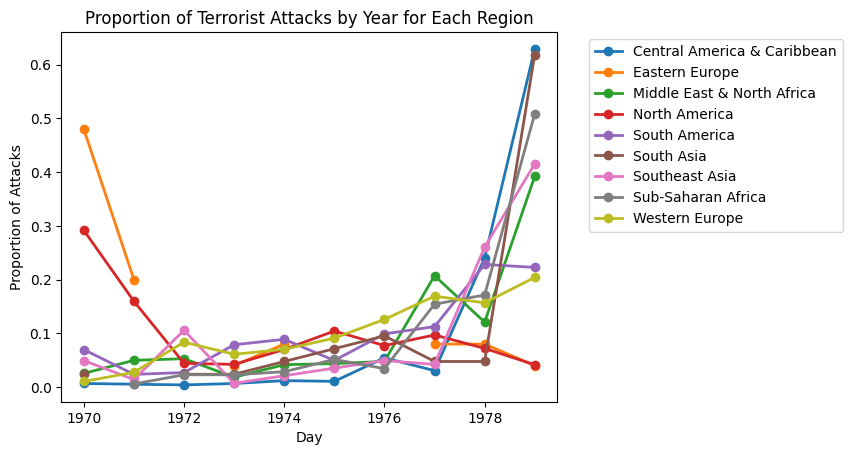

In [ ]:
# Group the data by region and year, and count the number of attacks
grouped_data = df1.groupby(['region_txt', 'iyear']).size().reset_index(name='count')

# Calculate the total number of attacks for each region
total_attacks = grouped_data.groupby('region_txt')['count'].sum()

# Calculate the proportion of attacks for each year and region
grouped_data['proportion'] = grouped_data['count'] / grouped_data['region_txt'].map(total_attacks)

# Pivot the data to have regions as columns and years as rows
pivot_data = grouped_data.pivot(index='iyear', columns='region_txt', values='proportion')

# Plot the proportions for each region
pivot_data.plot(kind='line', marker='o', linewidth=2)

# Set the plot title and labels
plt.title('Proportion of Terrorist Attacks by Year for Each Region')
plt.xlabel('Day')
plt.ylabel('Proportion of Attacks')

# Show the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


## Hypothesis 2: (Ray)

In [ ]:

df = df[(df['imonth'] != 0) & (df['iday'] != 0)]

def map_season(month):
    if month in [1, 2, 12]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

df['season'] = df['imonth'].map(map_season)

grouped_df = df.groupby('season')


<ipython-input-20-0310b75542af>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = df['imonth'].map(map_season)


In [ ]:
# Calculate counts of attributes by season
# Define the column names of interest
column_names = ['country_txt', 'region_txt', 'success', 'gname', 'weaptype1_txt']

# Create an empty dictionary to store the p-values
p_values = {}

# Iterate over the column names
for column in column_names:
    # Create a contingency table of the counts by season
    contingency_table = pd.crosstab(df['season'], df[column])

    # Perform the chi-square test for the contingency table
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    # Store the p-value in the dictionary
    p_values[column] = p_value

# Print the p-values for each column
for column, p_value in p_values.items():
    print(f"Column: {column}, p-value: {p_value}")


Column: country_txt, p-value: 2.0391901115021746e-54
Column: region_txt, p-value: 1.6807822034216075e-18
Column: success, p-value: 0.050828998064530104
Column: gname, p-value: 5.815773771933216e-113
Column: weaptype1_txt, p-value: 9.948742242771933e-11


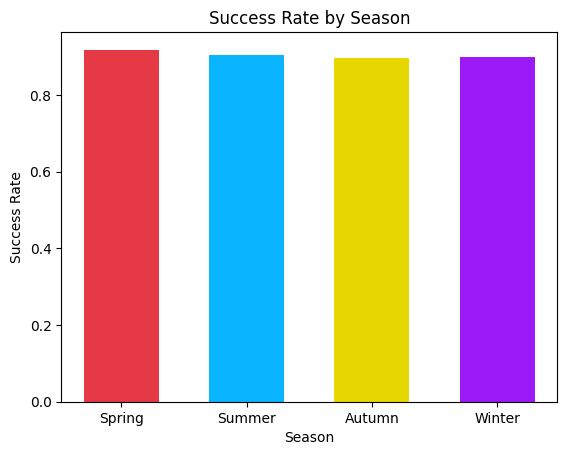

In [ ]:
# Assuming you have a DataFrame called 'df' with a column 'season' and a column 'success'

# Define the colors for each season
colors = ['#E63946', '#0bb4ff', '#e6d800', '#9b19f5']

# Group the data by 'season' and calculate the success rate
success_rate = df.groupby('season')['success'].value_counts(normalize=True).unstack()[1]
success_rate = success_rate.reindex(['Spring', 'Summer', 'Autumn', 'Winter'])

# Plotting a bar chart
plt.bar(success_rate.index, success_rate, color=colors, width=0.6)

# Set the labels and title
plt.xlabel('Season')
plt.ylabel('Success Rate')
plt.title('Success Rate by Season')

# Customize the x-axis tick labels
plt.xticks(success_rate.index)

# Display the plot
plt.show()

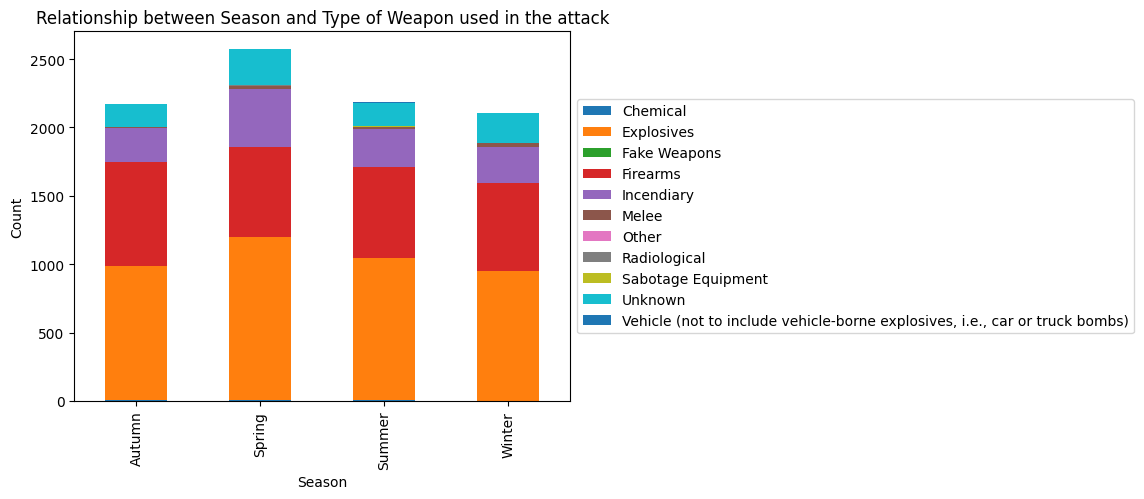

In [ ]:
# Group the data by 'group1' and 'group2' and calculate the counts
grouped_data = df.groupby(['season', 'weaptype1_txt']).size().unstack()

# Plotting a bar plot
ax = grouped_data.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Relationship between Season and Type of Weapon used in the attack')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()

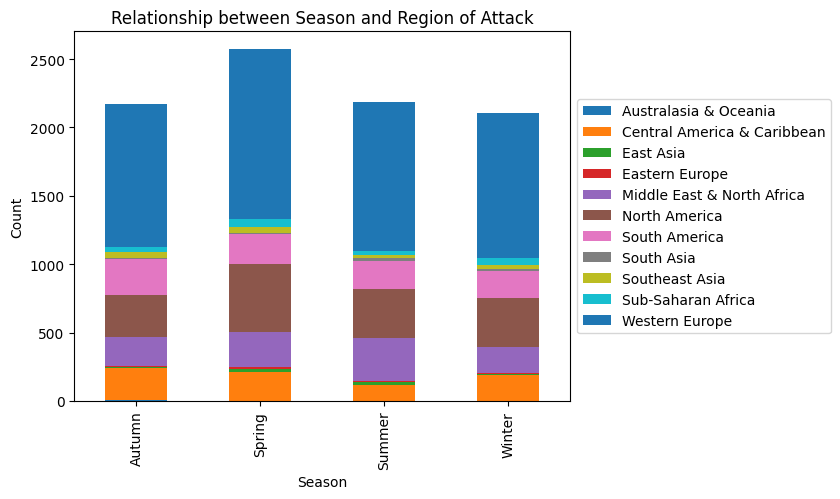

In [ ]:
#above shows that we cannot predict the country where the terrorist attack took place nor the gang name of who conducted the attack, as a p value of 0.0 is unreasonable.
#The graphs below show the the distribution of region, success, and weapon type based on the season that the attack occured.

# Group the data by 'group1' and 'group2' and calculate the counts
grouped_data = df.groupby(['season', 'region_txt']).size().unstack()

# Plotting a bar plot
ax = grouped_data.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Relationship between Season and Region of Attack')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()

## Hypothesis 3: In Iraq, the number of attacks in March 2014 is significantly greater compared to other months and years. (Kevin, Rik, Tony)


In [ ]:
df_iraq = df[df['country_txt'] == 'Iraq'].copy()
df_iraq

,eventid,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,success,...,target1,natlty1_txt,gname,guncertain1,individual,weaptype1_txt,dbsource,latitude,longitude,season
2854,197503010002,1975,3,1,0.0,Iraq,Middle East & North Africa,Nineveh,Mosul,1.0,...,B-737,Iraq,Unknown,0.0,0.0,Unknown,Hijacking DB,36.354145,43.143570,Spring
4385,197612150001,1976,12,15,0.0,Iraq,Middle East & North Africa,Baghdad,Baghdad,1.0,...,Airport terminal,Iraq,Unknown,0.0,0.0,Explosives,PGIS,33.303566,44.371773,Winter
4402,197612240001,1976,12,24,0.0,Iraq,Middle East & North Africa,Baghdad,Baghdad,1.0,...,Personnel,West Bank and Gaza Strip,Unknown,0.0,0.0,Firearms,PGIS,33.303566,44.371773,Winter
8688,197906150001,1979,6,15,0.0,Iraq,Middle East & North Africa,Basra,Basra,1.0,...,local secretary,Iraq,Unknown,0.0,0.0,Unknown,PGIS,30.510054,47.778095,Summer


In [ ]:
df_iraq.shape

(4, 23)

In [ ]:
df_iraq['date'] = df_iraq['iyear'].astype(str) + '-' + df_iraq['imonth'].astype(str)
df_iraq.head()

,eventid,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,success,...,natlty1_txt,gname,guncertain1,individual,weaptype1_txt,dbsource,latitude,longitude,season,date
2854,197503010002,1975,3,1,0.0,Iraq,Middle East & North Africa,Nineveh,Mosul,1.0,...,Iraq,Unknown,0.0,0.0,Unknown,Hijacking DB,36.354145,43.143570,Spring,1975-3
4385,197612150001,1976,12,15,0.0,Iraq,Middle East & North Africa,Baghdad,Baghdad,1.0,...,Iraq,Unknown,0.0,0.0,Explosives,PGIS,33.303566,44.371773,Winter,1976-12
4402,197612240001,1976,12,24,0.0,Iraq,Middle East & North Africa,Baghdad,Baghdad,1.0,...,West Bank and Gaza Strip,Unknown,0.0,0.0,Firearms,PGIS,33.303566,44.371773,Winter,1976-12
8688,197906150001,1979,6,15,0.0,Iraq,Middle East & North Africa,Basra,Basra,1.0,...,Iraq,Unknown,0.0,0.0,Unknown,PGIS,30.510054,47.778095,Summer,1979-6


In [ ]:
map_obj = folium.Map(location=(33.3152, 44.3661), zoom_start=8, tiles='cartodbpositron')

heatmap_data = []

for _, subset in df_iraq.groupby(['iyear', 'imonth']):
    coords = list(zip(subset['latitude'], subset['longitude']))
    weighted_coords = [[coord[0], coord[1], 1] for coord in coords]
    heatmap_data.append(weighted_coords)

heatmap_layer = plugins.HeatMapWithTime(heatmap_data, auto_play=True, max_opacity=0.8, radius=15)

heatmap_layer.add_to(map_obj)
map_obj

map_obj.save("heatmap.html")


In [ ]:
map_obj

In [ ]:
df_iraq_month_year = df_iraq.groupby(by = ['iyear', 'imonth'])['eventid'].count().reset_index()
df_iraq_month_year.columns = ['iyear', 'imonth', 'attack_count']

In [ ]:
df_iraq["date"] = pd.to_datetime(df_iraq["imonth"].astype(str) + " " + df_iraq["iyear"].astype(str))

In [ ]:
df_iraq_month_year['date'] = pd.to_datetime(df_iraq_month_year['iyear'].astype(str) + '-' + df_iraq_month_year['imonth'].astype(str))

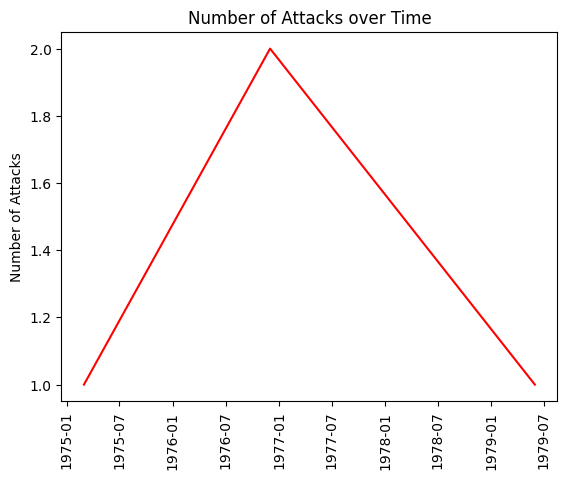

In [ ]:
plt.plot(df_iraq_month_year['date'], df_iraq_month_year['attack_count'], color = 'red');
plt.ylabel('Number of Attacks');
plt.xticks(rotation=90);  # Rotate the x-axis labels by 90 degrees;
plt.title('Number of Attacks over Time');
plt.savefig('timeplot.png', dpi = 300)

In [ ]:
df_iraq_month_year.sort_values('attack_count', ascending=False)

,iyear,imonth,attack_count,date
1,1976,12,2,1976-12-01
0,1975,3,1,1975-03-01
2,1979,6,1,1979-06-01


In [ ]:
march_2014_attacks = df_iraq_month_year[(df_iraq_month_year['iyear'] == 2014) & (df_iraq_month_year['imonth'] == 3)]['attack_count']
other_months_attacks = df_iraq_month_year[(df_iraq_month_year['iyear'] != 2014) & (df_iraq_month_year['imonth'] != 3)]['attack_count']
mean_other_months = other_months_attacks.mean()



In [ ]:
import scipy.stats as stats

# Perform one-sample t-test
statistic, p_value = stats.ttest_1samp(other_months_attacks, march_2014_attacks.values)

# Print the results
print("Null Hypothesis: The average number of attacks in other months is equal to the number of attacks in March 2014.")
print("Alternative Hypothesis: The average number of attacks in other months is different from the number of attacks in March 2014.")
print("Test Statistic:", statistic)
print("p-value:", p_value)


ValueError: ignored